In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, assemble, extensions
from qiskit.visualization import *

from os import environ

#local environment variable to store the access token :)
token = environ.get('ibmq_token')

In [2]:
# Loading your IBM Q account(s)
account = IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

In [3]:
# quasm_sim not necessary
simulator = Aer.get_backend('qasm_simulator')


In [4]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

# load the list of lists into a list :)
img_data = digits['images']
print(img_data[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


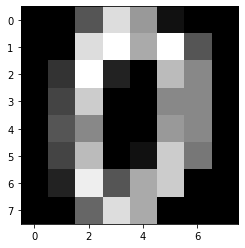

In [5]:

# setting the figure parameters to the size of the input
plt.rcParams['figure.figsize'] = [4, 4]

# testing one input
A = img_data[0]
B = img_data[5]

# displays image in grayscale
display = plt.imshow(A)
display.set_cmap('gray')


[[ 0.   11.5   8.75  1.25]
 [ 1.75  7.25  4.75  4.  ]
 [ 2.25  4.75  5.5   3.75]
 [ 0.5   9.5   8.    0.  ]]


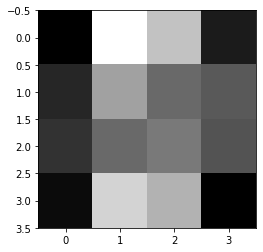

In [70]:
# compress image to a 4x4
r=4

# approx image:
Xapp = np.zeros((r,r))
for i in range(0, len(A), 2):
    for j in range(0, len(A), 2):
        sub_mat = np.zeros(r)
        sub_sum = 0
        sub_sum += A[i][j] + A[i][j+1] + A[i+1][j] + A[i+1][j+1] 
        Xapp[int(i/2)][int(j/2)] = sub_sum/4
        
print(np.array(Xapp))

plt.figure(1)
img = plt.imshow(Xapp)
img.set_cmap('gray')
plt.show()

[[ 0.   11.5   8.75  1.25]
 [ 1.75  7.25  4.75  4.  ]
 [ 2.25  4.75  5.5   3.75]
 [ 0.5   9.5   8.    0.  ]]

[[-0.71406945  0.54147768  0.42318928  0.13348252]
 [ 0.39592987  0.65446904 -0.34158336  0.54610495]
 [ 0.31901426 -0.27740405  0.71939318  0.55113551]
 [ 0.48122163  0.44890889  0.43209385 -0.61660478]]


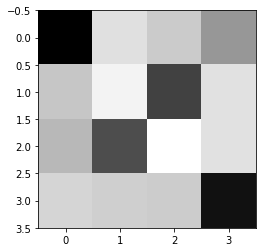

In [71]:
# Not sure if the inaccurate representation is an accurate one :) ie new unitary imgmap vs original imgmap
# perform full Singular Vector Decomposition (SVD) on compressed image
U, S, VT = np.linalg.svd(Xapp, full_matrices=True)

# take unitary parts for encoding
new_unitary = np.matmul(U, VT)

print(Xapp, new_unitary,sep='\n\n')

display = plt.imshow(new_unitary)
display.set_cmap('gray')

In [89]:
# circuit 2^n = 64, so n=6
qc = QuantumCircuit(2, 2)

# testing basic unitary
identity = np.identity(4)

print(len(new_unitary))
qc.unitary(new_unitary, [0, 1])

# measure qubit's output
qc.measure([0, 1], [0, 1])

qc.draw()


4


┌──────────┐┌─┐   
q_0: ┤0         ├┤M├───
     │  unitary │└╥┘┌─┐
q_1: ┤1         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  0  1

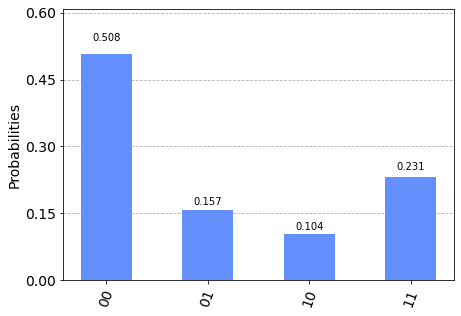

In [90]:
# run simulation 100000 times, stores results in counts
job = execute(qc, simulator, shots=100000)

results = job.result()

counts = results.get_counts(qc)

plot_histogram(counts)

In [91]:
""" NOT SURE HOW TO DECODE YET :("""

' NOT SURE HOW TO DECODE YET :('